In [1]:
import numpy as np
import pandas as pd

In [41]:
a=1.234567890123
a

1.234567890123

In [40]:
%precision

'%r'

In [42]:
a

1.234567890123

In [9]:
df = pd.read_csv('data/ch2_scores_em.csv',index_col='student number')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 1 to 50
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   english      50 non-null     int64
 1   mathematics  50 non-null     int64
dtypes: int64(2)
memory usage: 1.2 KB


In [12]:
# numpy : 1.14.3
# pandas : 0.23.0
np.__version__ , pd.__version__

('1.24.2', '2.0.0')

In [13]:
# !pip install numpy==1.24.2

In [18]:
df['english'].mean()

58.380

In [19]:
np.mean(df['english'])

58.380

In [20]:
df['english'].median()

57.500

In [22]:
np.median(df['english'])

57.500

In [44]:
scores = np.array(df['english'])[:10]
print(scores)
sorted_scores = np.sort(scores)
print(sorted_scores)
n = len(sorted_scores)
print(n)

[42 69 56 41 57 48 65 49 65 58]
[41 42 48 49 56 57 58 65 65 69]
10


In [45]:
if n % 2 == 0:
    m0 = sorted_scores[n//2-1]
    m1 = sorted_scores[n//2]
    median = (m0 + m1) / 2
    print(m0,m1)
else:
    loc = (n+1)//2 -1
    print(loc)
    median = sorted_scores[loc]


56 57


In [46]:
print(median)

56.5


In [47]:
np.median(sorted_scores)

56.5

In [48]:
df['english'].mode()

0    57
Name: english, dtype: int64

In [49]:
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [50]:
mean = np.mean(scores)
mean

55.0

In [51]:
deviation = scores - mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [52]:
deviation.sum()

0.0

In [53]:
a_scores = [50,60,58,54,51,56,57,53,52,59]
a_mean = np.mean(a_scores)
a_deviation = a_scores - mean
a_deviation

array([-5.,  5.,  3., -1., -4.,  1.,  2., -2., -3.,  4.])

In [54]:
a_deviation.sum()

0.0

In [55]:
scores_df = pd.DataFrame({'score':scores},
                         index=pd.Index(['A','B','C','D','E','F','G','H','I','J'],
                                       name='student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [57]:
summary_df = scores_df.copy()
summary_df['deviation'] = deviation
summary_df

,score,deviation
student,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


In [58]:
np.mean(deviation ** 2)

86.0

In [66]:
np.var(scores, ddof=1)

95.55555555555556

In [68]:
scores_df.var(ddof=0)

score    86.0
dtype: float64

In [60]:
summary_df['square of deviation'] = np.square(deviation)

In [69]:
summary_df.mean()

score                  55.0
deviation               0.0
square of deviation    86.0
dtype: float64

In [70]:
np.sqrt(np.var(scores,ddof=0))

9.273618495495704

In [71]:
np.std(scores,ddof=0)

9.273618495495704

In [73]:
np.max(scores),np.min(scores)

(69, 41)

In [74]:
np.max(scores)-np.min(scores)

28

In [75]:
q1 = np.percentile(scores,25)
q3 = np.percentile(scores,75)
q1,q3

(48.25, 63.25)

In [77]:
iqr = q3-q1
iqr

15.0

In [78]:
pd.Series(scores).describe()

count    10.000000
mean     55.000000
std       9.775252
min      41.000000
25%      48.250000
50%      56.500000
75%      63.250000
max      69.000000
dtype: float64

In [79]:
z = (scores-np.mean(scores))/np.std(scores)

In [80]:
z

array([-1.40182605,  1.50965882,  0.10783277, -1.50965882,  0.21566555,
       -0.75482941,  1.07832773, -0.64699664,  1.07832773,  0.32349832])

In [81]:
np.mean(z)

-1.6653345369377347e-17

In [82]:
np.std(z,ddof=0)

0.9999999999999999

In [83]:
z = 50 + 10 * (scores-np.mean(scores))/np.std(scores)
z

array([35.98173948, 65.09658825, 51.07832773, 34.90341175, 52.15665546,
       42.45170588, 60.78327732, 43.53003361, 60.78327732, 53.2349832 ])

In [84]:
np.mean(z)

50.0

In [85]:
np.std(z)

10.000000000000002

In [86]:
english_scores = np.array(df['english'])
english_scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58, 70, 47, 51, 64, 62, 70, 71,
       68, 73, 37, 65, 65, 61, 52, 57, 57, 75, 61, 47, 54, 66, 54, 54, 42,
       37, 79, 56, 62, 62, 55, 63, 57, 57, 67, 55, 45, 66, 55, 64, 66],
      dtype=int64)

In [88]:
pd.Series(english_scores).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

In [94]:
freq , _ = np.histogram(english_scores,bins=10,range=(0,100))

In [95]:
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [96]:
freq_class = [ f'{i}~{i+10}' for i in range(0,100,10)]

In [97]:
freq_class

['0~10',
 '10~20',
 '20~30',
 '30~40',
 '40~50',
 '50~60',
 '60~70',
 '70~80',
 '80~90',
 '90~100']

In [98]:
freq_dist_df = pd.DataFrame({'frequency':freq},
                            index = pd.Index(freq_class,
                                             name='class'))

In [99]:
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [100]:
class_value = [(i+(i+10))//2 for i in range(0,100,10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [101]:
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [102]:
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [104]:
freq_dist_df['class_value'] = class_value
freq_dist_df['relative_frequency'] = rel_freq
freq_dist_df['cumulative_relative_frequency'] = cum_rel_freq

In [105]:
freq_dist_df

,frequency,class_value,relative_frequency,cumulative_relative_frequency
class,,,,
0~10,0,5,0.00,0.00
10~20,0,15,0.00,0.00
20~30,0,25,0.00,0.00
30~40,2,35,0.04,0.04
40~50,8,45,0.16,0.20
50~60,16,55,0.32,0.52
60~70,18,65,0.36,0.88
70~80,6,75,0.12,1.00
80~90,0,85,0.00,1.00


In [106]:
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(),'class_value']

65

In [107]:
import matplotlib.pyplot as plt

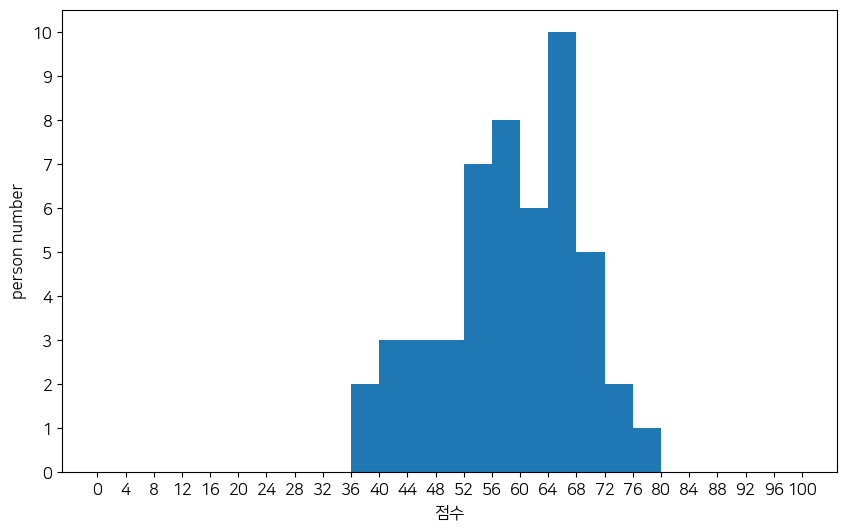

In [110]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
freq, _ , _ = ax.hist(english_scores,bins=25,range=(0,100))
ax.set_xlabel('점수')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0,100,25+1))
ax.set_yticks(np.arange(0,freq.max()+1))
plt.show()

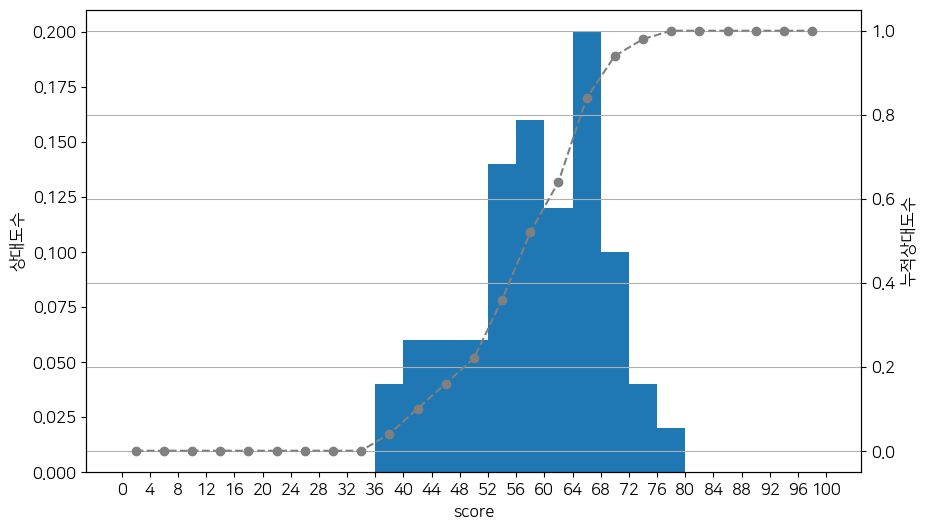

In [125]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
weights = np.ones_like(english_scores)/len(english_scores)
rel_freq,_,_ = ax1.hist(english_scores,
                        bins=25,
                        range=(0,100),
                        weights=weights)
cum_rel_freq = np.cumsum(rel_freq)
class_value = [ (i+(i+4))//2 for i in range(0,100,4)]
ax2.plot(class_value,
         cum_rel_freq,
         ls='--',
         marker='o',
         color='gray')
ax2.grid(visible=True)
ax1.set_xlabel('score')
ax1.set_ylabel('상대도수')
ax2.set_ylabel('누적상대도수')
ax1.set_xticks(np.linspace(0,100,25+1))
plt.show()

In [114]:
weights

array([0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02])

In [116]:
rel_freq

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.06,
       0.06, 0.06, 0.14, 0.16, 0.12, 0.2 , 0.1 , 0.04, 0.02, 0.  , 0.  ,
       0.  , 0.  , 0.  ])

In [118]:
freq*0.02

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.06,
       0.06, 0.06, 0.14, 0.16, 0.12, 0.2 , 0.1 , 0.04, 0.02, 0.  , 0.  ,
       0.  , 0.  , 0.  ])